In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

In [2]:
#import CSV file
df = pd.read_csv('Resources/Data/winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.drop_duplicates(keep= 'first', inplace = False)
df.dropna(axis = 'columns', how='all')
df.reset_index(drop =True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.shape

(1599, 12)

In [6]:
#Features for Quality
bins = [2,6,9]
labels = ['Fair', 'Very Good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels) 

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Fair
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Fair
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Fair
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Fair
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Fair


In [8]:
# Assign X (factors) and y (quality)
X = df.drop("quality", axis=1)
y = df["quality"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [9]:
df['quality'].value_counts()

Fair         1382
Very Good     217
Name: quality, dtype: int64

[0.07503118 0.10135937 0.09485067 0.07504298 0.06849652 0.06802644
 0.08605808 0.07781913 0.0662795  0.11055103 0.17648512]


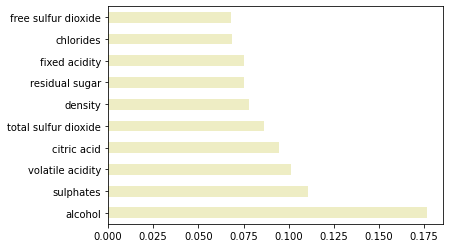

In [10]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind= "barh" , color = "#EEEDC4")
plt.show()


In [11]:
feat_importances.sort_values(ascending=False)

alcohol                 0.176485
sulphates               0.110551
volatile acidity        0.101359
citric acid             0.094851
total sulfur dioxide    0.086058
density                 0.077819
residual sugar          0.075043
fixed acidity           0.075031
chlorides               0.068497
free sulfur dioxide     0.068026
pH                      0.066279
dtype: float64

In [12]:
#Top5Features
top5_features= X[['alcohol', 'density', 'residual sugar', 'free sulfur dioxide', 'pH']]

# Train Test

### All Features

In [13]:
#All features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_value, X_test, y_value, y_test= train_test_split(X, y, random_state=42)

In [14]:
X_train.shape, X_value.shape, X_test.shape

((1199, 11), (1199, 11), (400, 11))

In [15]:
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_value, y_value)

(1.0, 1.0)

In [16]:
model.score(X_test, y_test)

0.91

In [17]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [18]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(1199, 11) (400, 11) (1199,)


### KNN

In [20]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.892
k: 3, Train/Test Score: 0.932/0.873
k: 5, Train/Test Score: 0.907/0.895
k: 7, Train/Test Score: 0.888/0.890
k: 9, Train/Test Score: 0.885/0.890
k: 11, Train/Test Score: 0.879/0.885
k: 13, Train/Test Score: 0.880/0.892
k: 15, Train/Test Score: 0.878/0.880
k: 17, Train/Test Score: 0.877/0.870
k: 19, Train/Test Score: 0.881/0.873


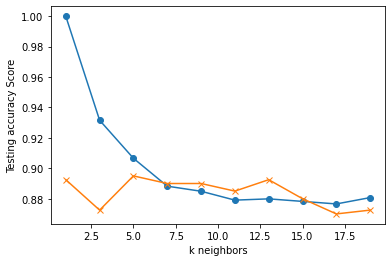

In [21]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Resources/images/red_all_features_KNN.jpg')
plt.show()

In [22]:
 # Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.890


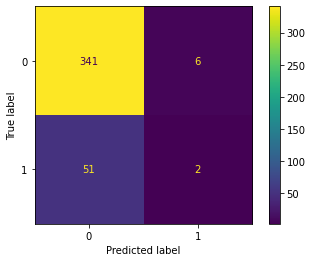

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/red_all_features_confu_KNN.jpg')

### Top 5 Features

In [24]:
#All features
X_train, X_test, y_train, y_test = train_test_split(top5_features, y, random_state=42)
X_value, X_test, y_value, y_test= train_test_split(top5_features, y, random_state=42)

In [25]:
X_train.shape, X_value.shape, X_test.shape

((1199, 5), (1199, 5), (400, 5))

In [26]:
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_value, y_value)

(1.0, 1.0)

In [27]:
model.score(X_test, y_test)

0.8825

In [28]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [29]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(1199, 5) (400, 5) (1199,)


### KNN

In [31]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.833
k: 3, Train/Test Score: 0.920/0.843
k: 5, Train/Test Score: 0.903/0.875
k: 7, Train/Test Score: 0.893/0.868
k: 9, Train/Test Score: 0.891/0.865
k: 11, Train/Test Score: 0.891/0.868
k: 13, Train/Test Score: 0.885/0.863
k: 15, Train/Test Score: 0.886/0.858
k: 17, Train/Test Score: 0.877/0.860
k: 19, Train/Test Score: 0.876/0.860


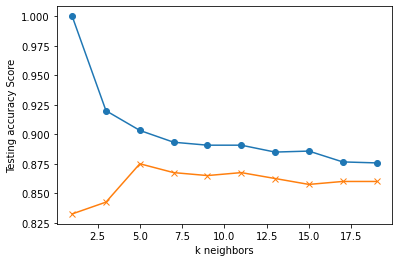

In [32]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Resources/images/red_top5_features_KNN.jpg')
plt.show()

In [33]:
 # Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.875


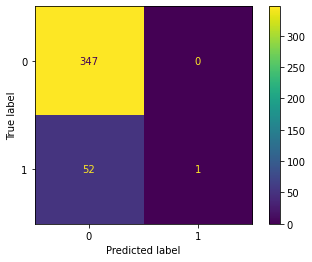

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/red_top5_features_confu_KNN.jpg')